In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import path
import sys

F:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
plt.style.use('seaborn-notebook')

In [3]:
tf.__version__,pd.__version__

('1.12.0', '0.23.0')

In [5]:
DIR='F:\Electricity_forecast'
DATA_DIR=DIR+'\data'
df_list=[]
filepath=path.Path(DATA_DIR)
if filepath.exists():
    for file in filepath.files():
        df_list.append(pd.read_csv(file,sep=';'))
electric_df=pd.concat(df_list)

In [6]:
electric_df.head()

,DateTime,Wind Speed,Power Generated,Unnamed: 3
0,02-08-2016 00:00,9.80310,86560.0,NaN
1,02-08-2016 00:15,9.86182,84960.0,NaN
2,02-08-2016 00:30,9.92055,80320.0,NaN
3,02-08-2016 00:45,9.57913,77040.0,NaN
4,02-08-2016 01:00,9.23771,73760.0,NaN


In [7]:
electric_df.set_index(pd.to_datetime(electric_df['DateTime']),inplace=True)

In [8]:
electric_df.iloc[:,:-1].isna().sum()

DateTime              0
Wind Speed         5088
Power Generated       0
dtype: int64

## Ploting

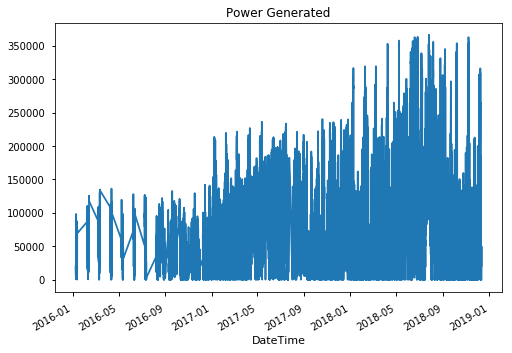

In [9]:
electric_df['Power Generated'].plot(title='Power Generated')
plt.show()

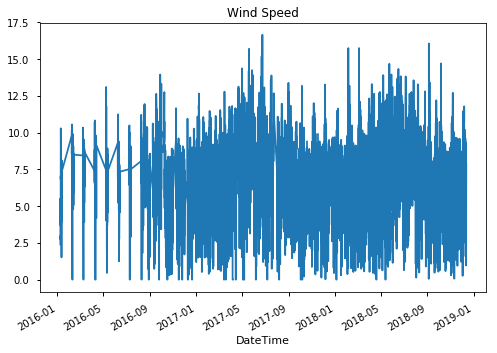

In [15]:
electric_df['Wind Speed'].plot(title='Wind Speed')
plt.show()

# Monthwise

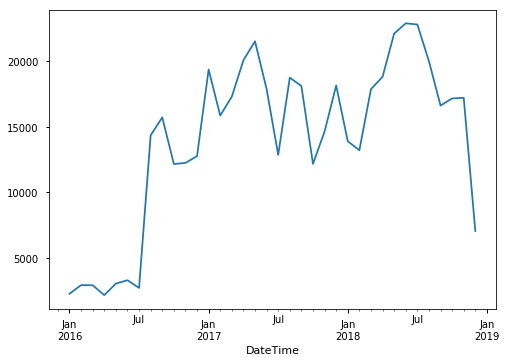

In [10]:
electric_df.resample('1m').sum()['Wind Speed'].plot()

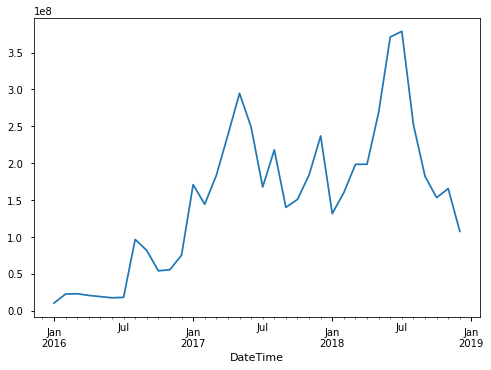

In [11]:
electric_df.resample('1m').sum()['Power Generated'].plot()

# Weekly

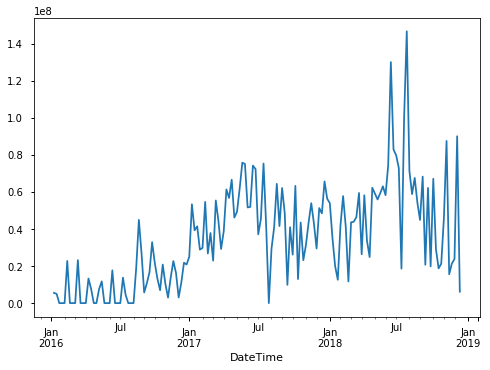

In [13]:
electric_df.resample('1w').sum()['Power Generated'].plot()

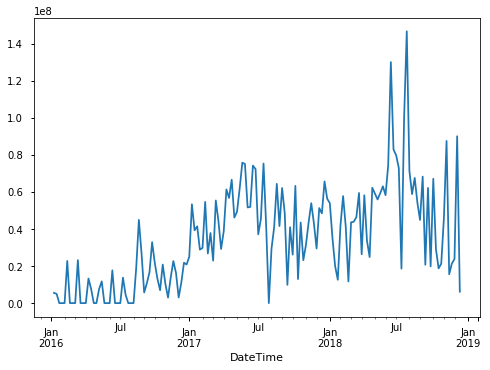

In [14]:
electric_df.resample('1w').sum()['Power Generated'].plot()

# Daywise

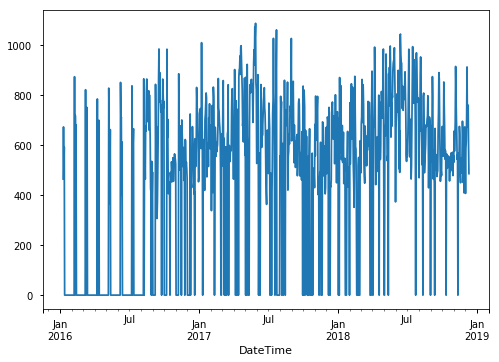

In [21]:
electric_df.resample('1D').sum()['Wind Speed'].plot()

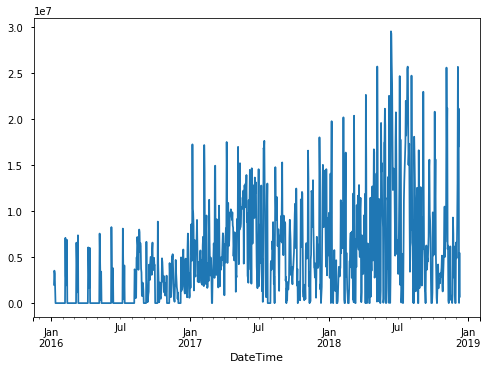

In [24]:
electric_df.resample('1D').sum()['Power Generated'].plot()

# Train -test Split

In [15]:
electric_df['Power Generated'].values.reshape(1,-1)

array([[86560., 84960., 80320., ...,     0.,     0.,     0.]])

In [17]:
from sklearn.preprocessing import StandardScaler,Normalizer
scalar=Normalizer()
electric_df['PowerGenScaled']=scalar.fit_transform(electric_df['Power Generated'].values.reshape(1,-1)).reshape(-1)

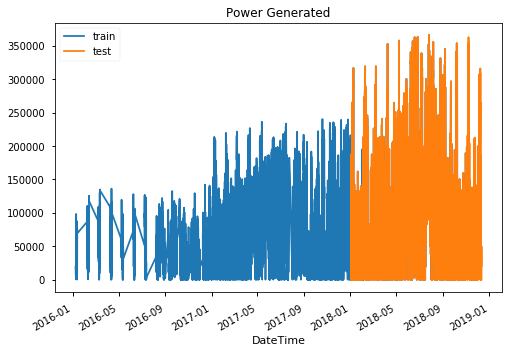

In [19]:
train=electric_df[:'2018-10']
test=electric_df['2018-10':]
train['Power Generated'].plot(label='train')
test['Power Generated'].plot(label='test')
plt.title('Power Generated')
plt.legend()
plt.show()

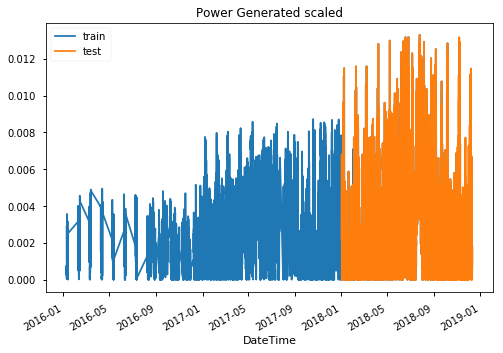

In [20]:
train['PowerGenScaled'].plot(label='train')
test['PowerGenScaled'].plot(label='test')
plt.title('Power Generated scaled')
plt.legend()
plt.show()

# Neural Networks-Model Building

## Approach 1 -Treating power Generated as Sequence

In [21]:
INP_SEQ=192
OUT_SEQ=96 # for one day

In [23]:
array=train['PowerGenScaled'].values
def powerG():
    inp_l=[]
    out_l=[]
    for i in range(array.shape[0]-(INP_SEQ+OUT_SEQ)):
        yield (array[i:i+192].reshape(1,-1),array[i+192:i+192+96].reshape(1,-1))
        
def prepare_data(array):
    print(array.shape)
    inp_l=[]
    out_l=[]
    for i in range(array.shape[0]-(INP_SEQ+OUT_SEQ)):
        inp_l.append(array[i:i+192])
        out_l.append(array[i+192:i+192+96])
    X=np.array(inp_l)
    Y=np.array(out_l)
    return X,Y

In [24]:
X,Y=prepare_data(train['Power Generated'])

(77527,)


ludwigdf=pd.DataFrame({'inp_ts':[X],'out_ts':[Y]},index=range(len(X)))
ludwigdf.to_csv(DIR+'/ludwig_ts.csv')

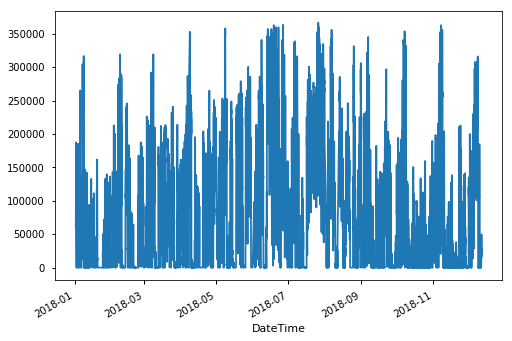

In [25]:
test['Power Generated'][test['Power Generated'].isna()]
test['Power Generated'].plot()

In [99]:
arraytest=test['PowerGenScaled'].values
def powerGtest(use_as_iter=True):
    if use_as_iter:
        for i in range(arraytest.shape[0]-(INP_SEQ+OUT_SEQ)):
            yield (arraytest[i:i+192].reshape(1,-1),arraytest[i+192:i+192+96].reshape(1,-1))
def inference():
    inp_l=[]
    out_l=[]
    for i in range(arraytest.shape[0]-(INP_SEQ+OUT_SEQ)):
        inp_l.append(array[i:i+192])
        out_l.append(array[i+192:i+192+96])
    X=np.array(inp_l)
    Y=np.array(out_l)
    return X,Y
#xt,yt=powerGtest()

In [100]:
dstest=tf.data.Dataset.from_generator(powerGtest,(tf.float64,tf.float64),(tf.TensorShape([1,192]),tf.TensorShape([1,96])))

In [80]:
ds=tf.data.Dataset.from_generator(powerG,(tf.float32,tf.float32),(tf.TensorShape([1,192]),tf.TensorShape([1,96])))

In [101]:
value=dstest.make_one_shot_iterator().get_next()

In [102]:
sess=tf.Session()
sess.run(value)

(array([[0.00555365, 0.00530689, 0.0051356 , 0.00446499, 0.00375953,
         0.00326019, 0.00306278, 0.00295827, 0.0028886 , 0.00306278,
         0.00315278, 0.00323987, 0.00338793, 0.00366082, 0.00387565,
         0.0039163 , 0.00389598, 0.00392501, 0.00398597, 0.00397146,
         0.00406145, 0.00408468, 0.00395984, 0.00378856, 0.00361147,
         0.00346341, 0.00343148, 0.00340535, 0.00351857, 0.00361728,
         0.0036405 , 0.00366953, 0.00375953, 0.00389307, 0.00391049,
         0.00380888, 0.00341406, 0.00296117, 0.00272602, 0.00255764,
         0.002427  , 0.00259248, 0.00283634, 0.00292924, 0.00296408,
         0.00287408, 0.00271441, 0.00257216, 0.00241249, 0.00208443,
         0.00196831, 0.00191896, 0.00207282, 0.00219185, 0.00219766,
         0.00229926, 0.00245894, 0.00281602, 0.0030773 , 0.003356  ,
         0.00316439, 0.00310633, 0.00318181, 0.00337342, 0.0035418 ,
         0.00361728, 0.00340825, 0.00334438, 0.00327181, 0.00293505,
         0.00245023, 0.0025199 , 0

In [32]:
class RNN(tf.keras.Model):
    def __init__(self, outseq,num_units=192,batch_size=1):
        super().__init__()
        self.outseq = outseq
        self.batch_size=batch_size
        self.cell = tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell',num_units=num_units)
        self.dense = tf.keras.layers.Dense(units=self.outseq)

    def call(self, inputs):
        state = self.cell.zero_state(batch_size=self.batch_size, dtype=tf.float32)
        output,state=self.cell(inputs,state)
        output=self.dense(output)
        return output

In [33]:
lstm=RNN(outseq=96)
lstm.compile('adam',loss='mse')

In [41]:
TB=tf.keras.callbacks.TensorBoard('./logs2',histogram_freq=10,write_grads=True,batch_size=32,write_graph=True)
ES=tf.keras.callbacks.EarlyStopping(patience=20)
MC=tf.keras.callbacks.ModelCheckpoint('./lstm2.h5',save_weights_only=True)
lstm.load_weights('./lstm2.h5')
history=lstm.fit(ds,epochs=10,steps_per_epoch=500,validation_data=dstest,validation_steps=10,callbacks=[ES,MC,TB])

Epoch 1/10
500/500 [==============================] - 19s 39ms/step - loss: 4.3645e-07 - val_loss: 3.6649e-07
Epoch 2/10
500/500 [==============================] - 18s 36ms/step - loss: 2.7773e-07 - val_loss: 9.6200e-07
Epoch 3/10
500/500 [==============================] - 17s 35ms/step - loss: 4.3827e-07 - val_loss: 5.3484e-07
Epoch 4/10
500/500 [==============================] - 21s 42ms/step - loss: 5.1922e-07 - val_loss: 1.0627e-06
Epoch 5/10
500/500 [==============================] - 25s 50ms/step - loss: 2.3351e-07 - val_loss: 3.0721e-07
Epoch 6/10
500/500 [==============================] - 22s 44ms/step - loss: 2.1389e-07 - val_loss: 5.1787e-07
Epoch 7/10
500/500 [==============================] - 18s 36ms/step - loss: 3.1228e-07 - val_loss: 3.4295e-07
Epoch 8/10
500/500 [==============================] - 19s 37ms/step - loss: 1.9534e-07 - val_loss: 1.5867e-06
Epoch 9/10
500/500 [==============================] - 18s 36ms/step - loss: 7.4633e-07 - val_loss: 3.0291e-07
Epoch 10/1

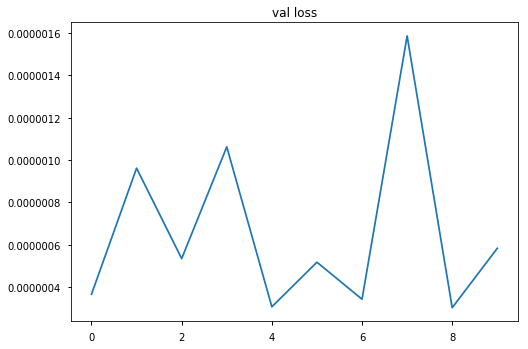

In [46]:
plt.plot(lstm.history.history['val_loss'])
plt.title('val loss')
plt.show()

In [50]:
lstm.evaluate(dstest,steps=1)

1/1 [==============================] - 0s 4ms/step


3.911537078238325e-06

In [57]:
predicted=lstm.predict(dstest,steps=1)

In [58]:
predicted.shape

(1, 96)

# inference or prediction time

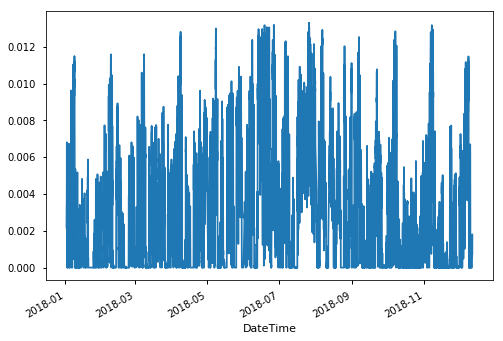

In [61]:
test['PowerGenScaled'].plot()

In [66]:
predicted=lstm.predict_on_batch(dstest)

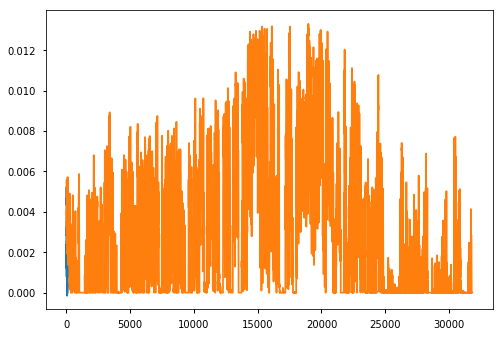

In [70]:
plt.plot(predicted.reshape(-1))
plt.plot(test['PowerGenScaled'].values)
plt.show()

In [111]:
xtest,ytest=inference()
#lstm.predict(X)

In [116]:
xtest.shape

(31543, 192)

In [129]:
lstm.predict(ytest[0])

ValueError: ('Error when checking model input: expected no data, but got:', array([0.00395694, 0.00405274, 0.00397146, 0.00356502, 0.00324858,
       0.00285666, 0.00263022, 0.00281312, 0.00284215, 0.00272893,
       0.00247345, 0.00236894, 0.00211637, 0.00189573, 0.00189283,
       0.00195089, 0.00187541, 0.0017709 , 0.00165187, 0.00161123,
       0.00176219, 0.00206702, 0.00238636, 0.0023283 , 0.00210476,
       0.00169251, 0.00152413, 0.00180283, 0.00193347, 0.00182025,
       0.00180283, 0.00191605, 0.0020496 , 0.00236604, 0.00249958,
       0.00247345, 0.00249668, 0.00231088, 0.00218024, 0.00203218,
       0.00203508, 0.00206992, 0.00162865, 0.00137027, 0.0013035 ,
       0.00139059, 0.00165768, 0.0013035 , 0.00119318, 0.00146317,
       0.00153865, 0.00157639, 0.00127447, 0.00095512, 0.00086513,
       0.00070546, 0.00076352, 0.0008361 , 0.00143704, 0.00216572,
       0.00194799, 0.0018696 , 0.00208734, 0.00221507, 0.00243281,
       0.00250248, 0.00254603, 0.00246184, 0.00243571, 0.00304827,
       0.00340825, 0.00311794, 0.00285666, 0.00263893, 0.00265635,
       0.00266506, 0.00272893, 0.00245023, 0.002427  , 0.00278699,
       0.00271151, 0.00264764, 0.00274634, 0.00305117, 0.00330664,
       0.0030831 , 0.00299021, 0.00301924, 0.00302214, 0.00313536,
       0.00316149, 0.00275215, 0.00274634, 0.0028944 , 0.00301633,
       0.00281312]))

lstmestimator=tf.keras.estimator.model_to_estimator(keras_model=lstm)

In [108]:
inp=tf.keras.Input((192,))
mm=tf.keras.Model(inp,lstm)
mm.predict(xtest)

ValueError: Output tensors to a Model must be the output of a TensorFlow `Layer` (thus holding past layer metadata). Found: <__main__.RNN object at 0x0000017FA87A1128>